# Data Analysis and Exploration 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from itertools import product

In [2]:
df = pd.read_csv('../data/csv/combined_subreddits.csv')
df.head()

,title,num_comments,score,over_18,locked,stickied,subreddit,created_utc,is_self,selftext
0,How to find a math REU for this summer,44,66,False,False,False,math,1483228857,True,"If you, or someone you love, is an undergradua..."
1,"Found this weird typo in a book I was reading,...",0,0,False,False,False,math,1483229911,False,[deleted]
2,2017 is a prime number.,4,0,False,False,False,math,1483233013,True,[removed]
3,Injective functions,2,0,False,False,False,math,1483248460,True,[removed]
4,Want to go into a major requiring Calculus but...,1,1,False,False,False,math,1483250603,True,[removed]


## Distinguishing Posts By Expertise

We're going to try to distinguish posts which come from an `expert` subreddit vs. a `learn` subreddit. I'm not trying to claim some sort of epistimilogical association with my choices for the `expert` polaceholder for `machinelearning`, it's just that the `machinelearning` subreddit is not very active.

|Expert| Learn|
|-|-|
|`python`| `learnpython`|
|`math`| `learnmath`|
|`datascience`| `learnmachinelearning`|






## Number of Comments

In [3]:
division = [
    ('math', 'learnmath'),
    ('Python', 'learnpython'),
    ('datascience', 'learnmachinelearning'),
]

Below is the distribution of the number of comments according to subject matter. I've cut off those data points with have more comments than $99\%$ of other posts since a few of those are very large outliers. The blue plots correspond to the `expert` version and the orange is the `learn` version.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


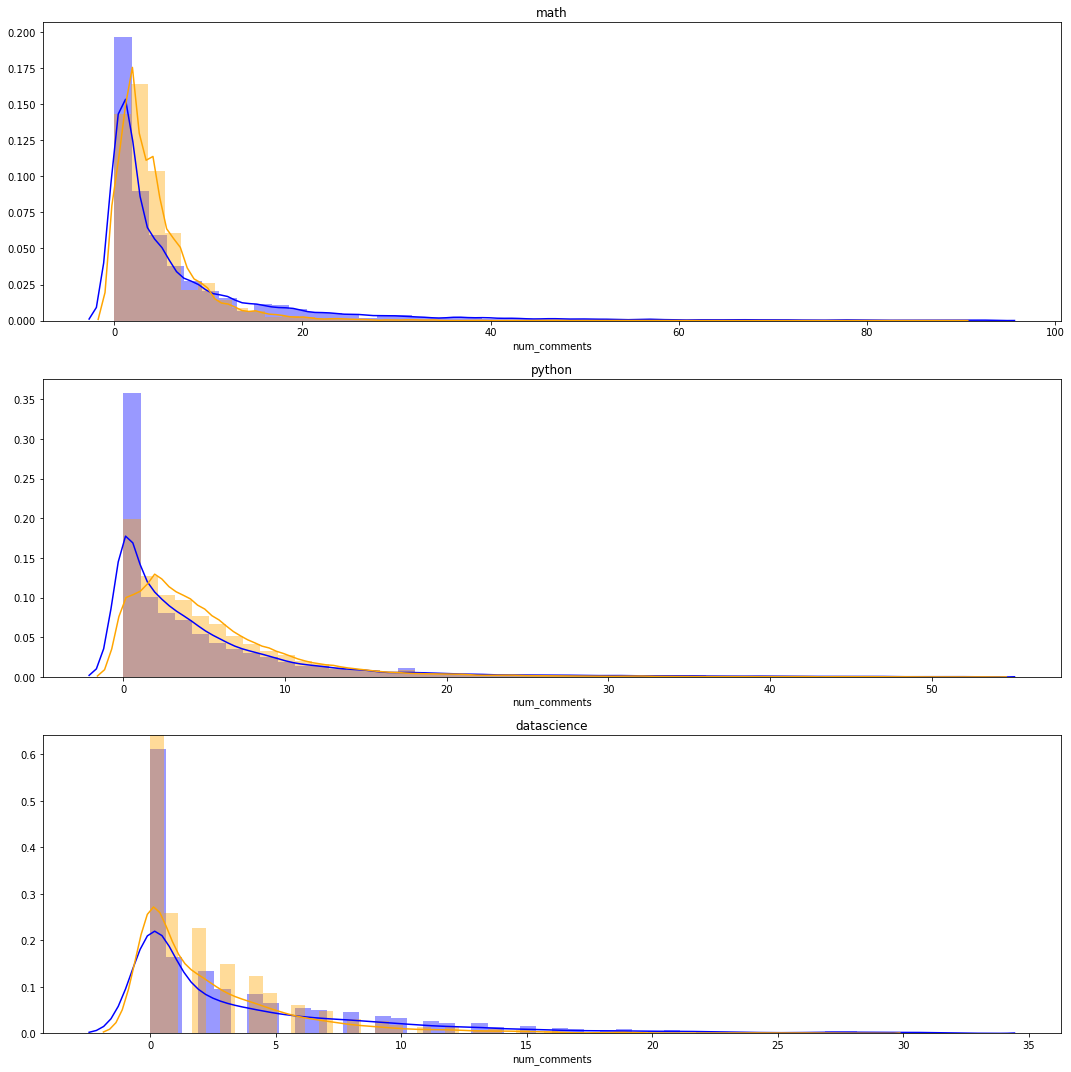

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
cut_off = 99

for index, (expert, learn) in enumerate(division):
    
    exp_mask = (df['subreddit'] == expert)
    learn_mask = (df['subreddit'] == learn)
    subj_df = df[exp_mask | learn_mask]['num_comments']
    subj_cut_off = np.percentile(a=subj_df, q=cut_off)
    
    subj_df = subj_df[subj_df < subj_cut_off]
    
    sns.distplot(a=subj_df[exp_mask], color='blue', ax=ax[index])
    sns.distplot(a=subj_df[learn_mask], color='orange', ax=ax[index])
    ax[index].set_title(expert.lower())
    
plt.tight_layout()

As in the previous analysis (of the `all` data), the `num_comments` feature is fairly skewed, but the log transfrom does not operate on this feature so nicely as before so we won't actually keep that transformed data.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


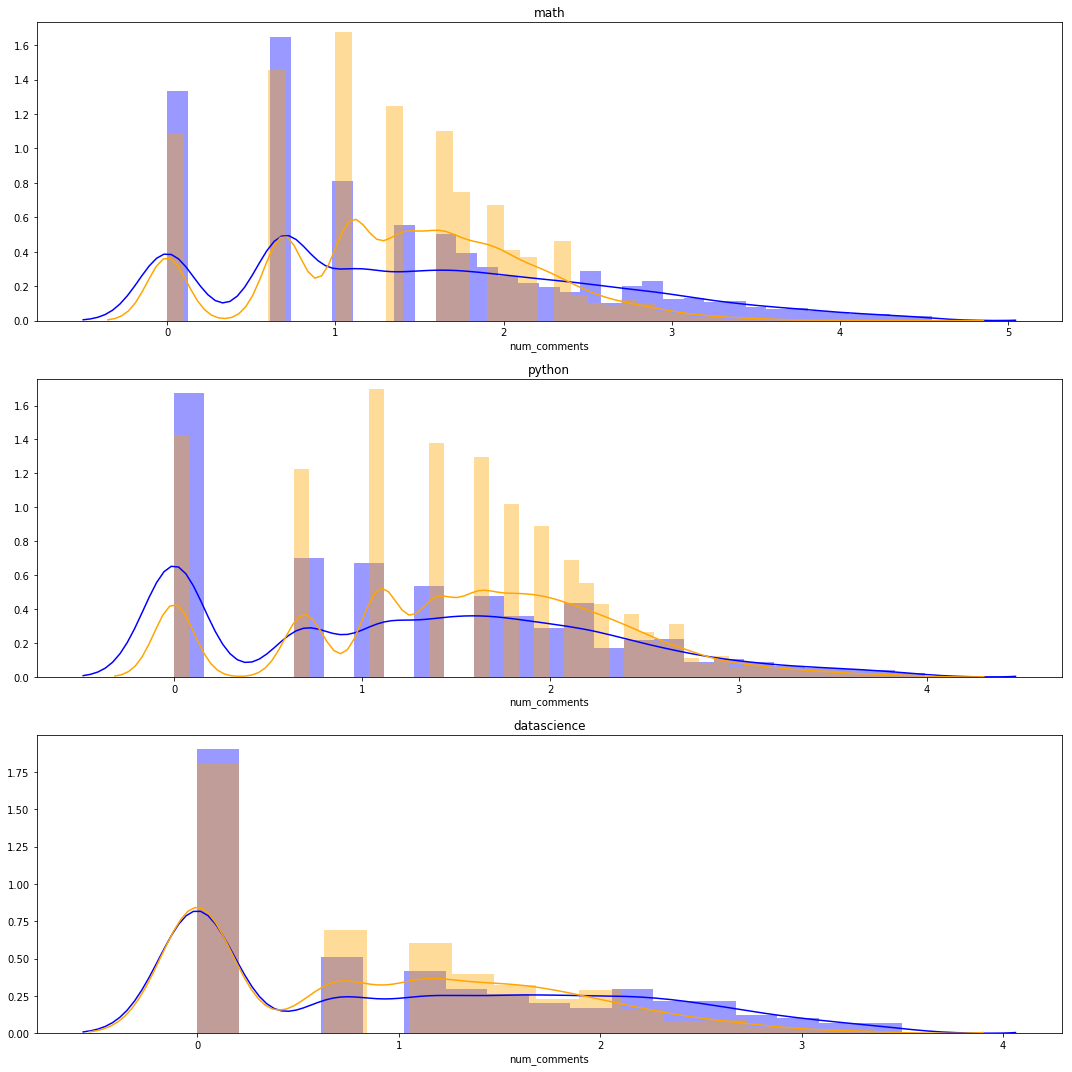

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
cut_off = 99

for index, (expert, learn) in enumerate(division):
    
    exp_mask = (df['subreddit'] == expert)
    learn_mask = (df['subreddit'] == learn)
    subj_df = df[exp_mask | learn_mask]['num_comments']
    subj_cut_off = np.percentile(a=subj_df, q=cut_off)
    
    subj_df = subj_df[subj_df < subj_cut_off]
    
    sns.distplot(a=np.log1p(subj_df[exp_mask]), color='blue', ax=ax[index])
    sns.distplot(a=np.log1p(subj_df[learn_mask]), color='orange', ax=ax[index])
    ax[index].set_title(expert.lower())
    
plt.tight_layout()

## Time Created

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


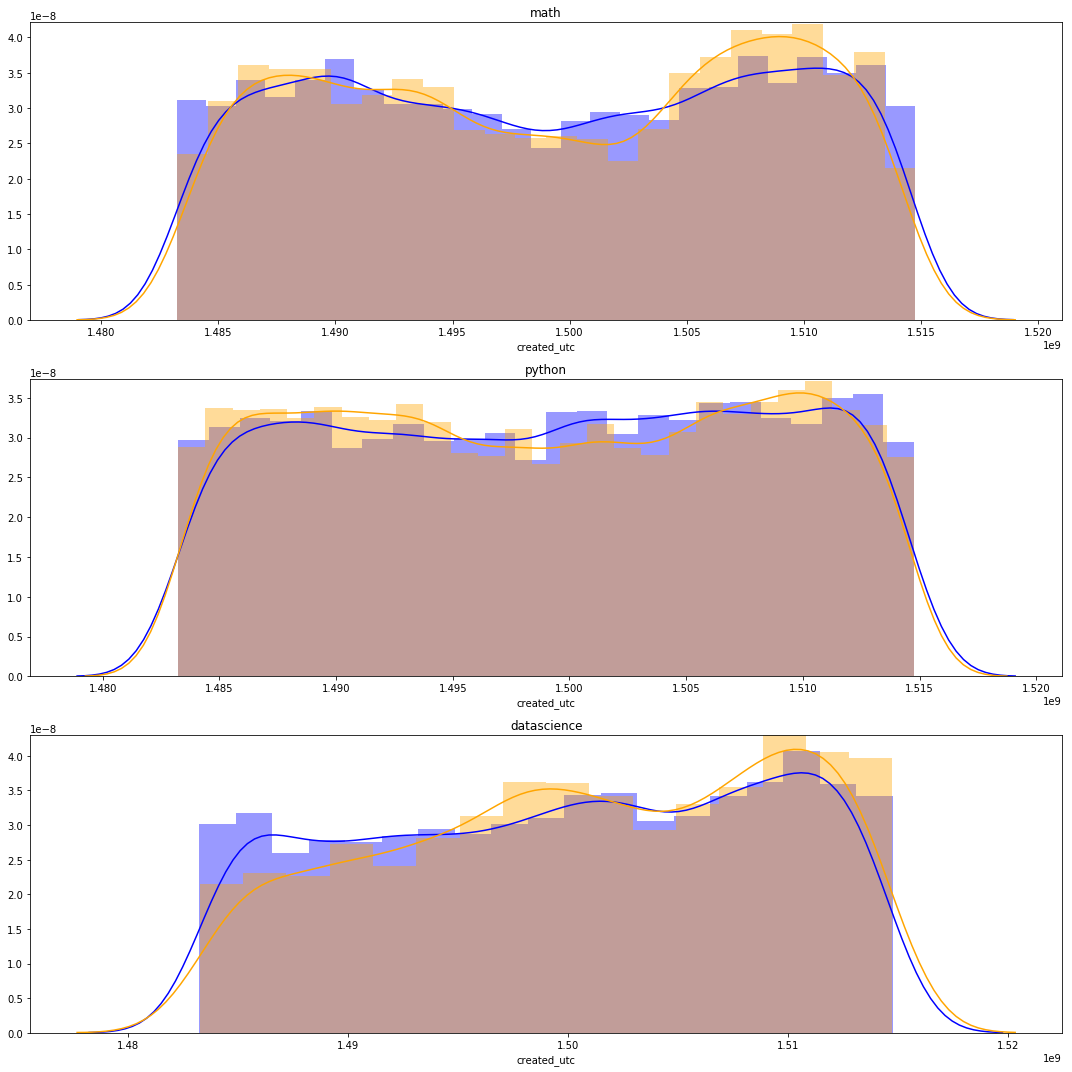

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

for index, (expert, learn) in enumerate(division):

    exp_mask = (df['subreddit'] == expert)
    learn_mask = (df['subreddit'] == learn)
        
    sns.distplot(a=df[exp_mask]['created_utc'], color='blue', ax=ax[index])
    sns.distplot(a=df[learn_mask]['created_utc'], color='orange', ax=ax[index])
    ax[index].set_title(expert.lower())
    
plt.tight_layout()

These graphs are plotted with an x-axis tracking the `created_utc` feature. This feature is the number of seconds since epoch time in coordinated universal time. Judging from these graphs, there has been an increase in activity in the `datascience` group over the last year, whereas the `math` and `python` groups have not experienced the same growth.

## Categorical Variables

In [7]:
df['stickied'].value_counts()

False    106236
True        196
Name: stickied, dtype: int64

In [8]:
df['is_self'].value_counts()

True     82695
False    23737
Name: is_self, dtype: int64

In [9]:
df['over_18'].value_counts()

False    106388
True         44
Name: over_18, dtype: int64

In [10]:
df['locked'].value_counts()

False    106382
True         50
Name: locked, dtype: int64

I think we can safely discard the `stickied` and `over_18` feature since we have so few of them. It could also be argued that stickied posts represent their own category of post and should be ignored anyway wholesale. 

In [11]:
df.drop(['stickied', 'locked', 'over_18'], 1, inplace=True)

## Title of Thread

In the modeling pipeline we'll take care of the natural language processing, but we can at least take a look at the relationshipb between, for example, title length and perfomance.

In [12]:
df['title_len'] = df['title'].str.len()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


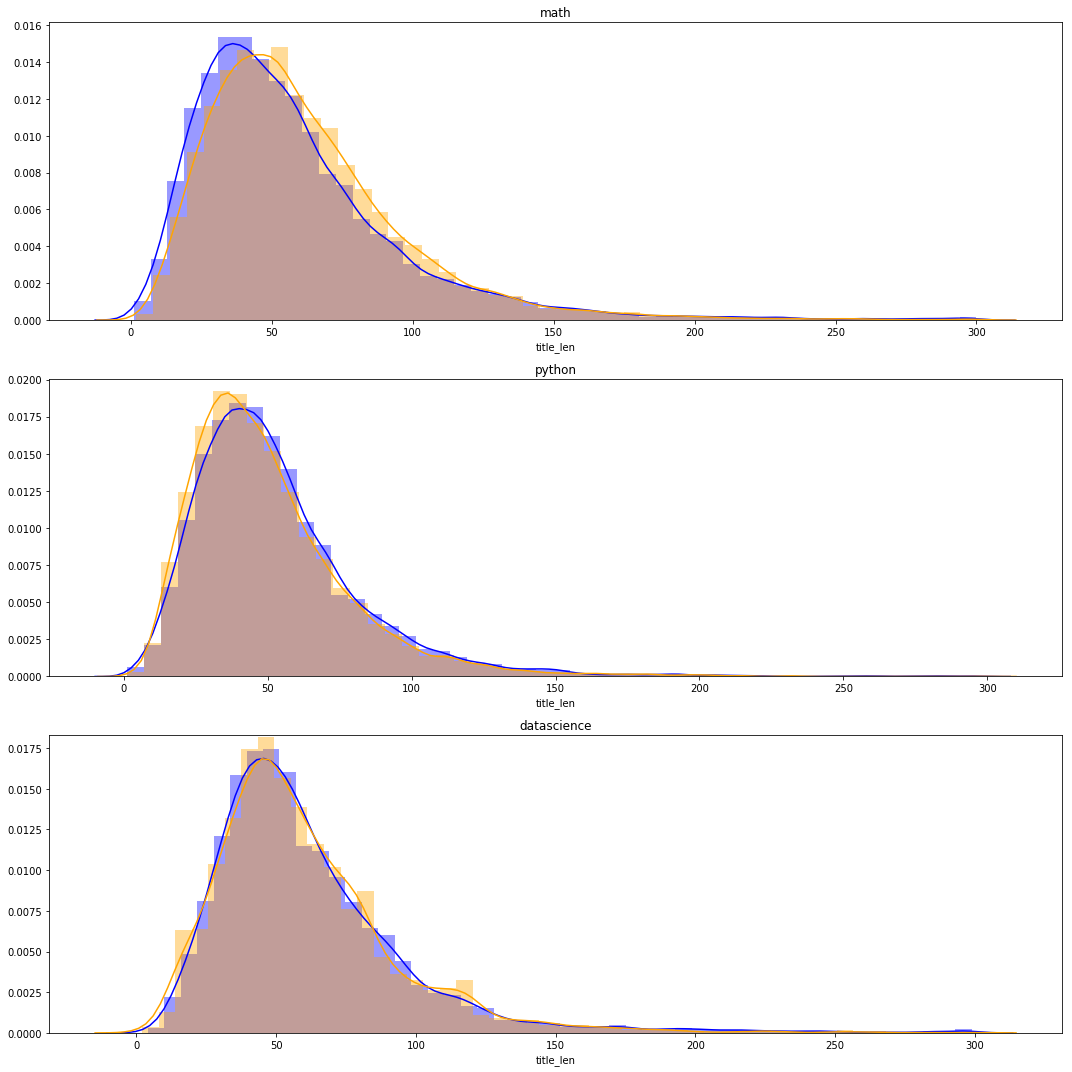

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

for index, (expert, learn) in enumerate(division):
    
    exp_mask = (df['subreddit'] == expert)
    learn_mask = (df['subreddit'] == learn)
        
    sns.distplot(a=df[exp_mask]['title_len'], color='blue', ax=ax[index])
    sns.distplot(a=df[learn_mask]['title_len'], color='orange', ax=ax[index])
    ax[index].set_title(expert.lower())
    
plt.tight_layout()

It's not a huge distinction but there's definitely a discrepancy between the `python` and `math` distributions. In the `math` data the `expert` posts tend to have shorter titles than the `learn` posts. For the `python` class, this relationship is reversed. Again these distributions are a bit skewed, but a log transform will help with that. 

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


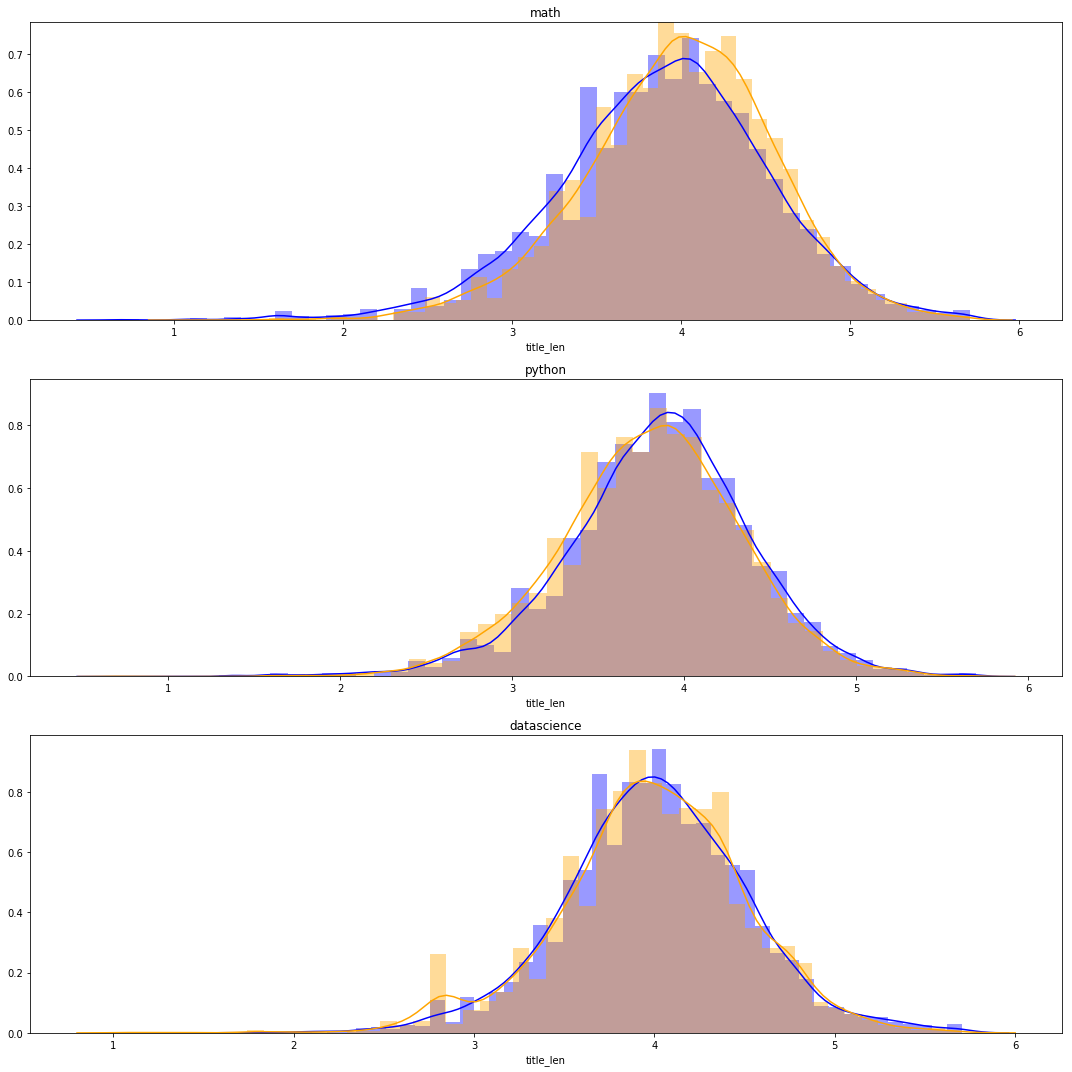

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

for index, (expert, learn) in enumerate(division):
    
    exp_mask = (df['subreddit'] == expert)
    learn_mask = (df['subreddit'] == learn)
        
    sns.distplot(a=np.log1p(df[exp_mask]['title_len']), color='blue', ax=ax[index])
    sns.distplot(a=np.log1p(df[learn_mask]['title_len']), color='orange', ax=ax[index])
    ax[index].set_title(expert.lower())
    
plt.tight_layout()

In [15]:
df['title_len_log1p'] = np.log1p(df['title_len'])

## Summary

In [16]:
df.to_csv('../data/csv/combined_subreddits_processed.csv', index=False)